## HEXSOFTWARES PROJECT  2

## Simple Linear Regression on Housing Prices

## Task:

Use a housing prices dataset (like the Boston Housing dataset).
Perform data preprocessing, including feature selection and
normalization.

Build a linear regression model to predict house prices based on
features like the number of rooms, square footage, etc.

## The database that I am using on this notebook is taken from Kaggle " Australian Housing Prices " by By Jeff (The Devastator · Updated 2 years ago)

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
import os
import shutil

# Define the directory where kaggle.json should be placed
kaggle_dir = os.path.join(os.path.expanduser('~'), '.kaggle')
os.makedirs(kaggle_dir, exist_ok=True)

# Move kaggle.json to the .kaggle directory
shutil.move(r"C:\Users\princ\anaconda3\Lib\site-packages\pip\_internal\metadata\_json.py", os.path.join(kaggle_dir, 'kaggle.json'))

# Set permissions for the kaggle.json file
os.chmod(os.path.join(kaggle_dir, 'kaggle.json'), 0o600)


In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

api.dataset_download_files("thedevastator/australian-housing-data-1000-properties-sampled", path='.', unzip=True)


In [9]:
import pandas as pd

# Load the data
housing_data = pd.read_csv("RealEstateAU_1000_Samples.csv")

# Display the first few rows
print(housing_data.head())


   index      TID          breadcrumb  \
0      0  1350988  Buy>NT>DARWIN CITY   
1      1  1350989  Buy>NT>DARWIN CITY   
2      2  1350990  Buy>NT>DARWIN CITY   
3      3  1350991  Buy>NT>DARWIN CITY   
4      4  1350992  Buy>NT>DARWIN CITY   

                                       category_name property_type  \
0  Real Estate & Property for sale in DARWIN CITY...         House   
1  Real Estate & Property for sale in DARWIN CITY...     Apartment   
2  Real Estate & Property for sale in DARWIN CITY...          Unit   
3  Real Estate & Property for sale in DARWIN CITY...         House   
4  Real Estate & Property for sale in DARWIN CITY...          Unit   

  building_size land_size preferred_size           open_date  \
0           NaN       NaN            NaN   Added 2 hours ago   
1         171m²       NaN          171m²   Added 7 hours ago   
2           NaN       NaN            NaN  Added 22 hours ago   
3           NaN       NaN            NaN     Added yesterday   
4         20

## Data Cleaning 

In [25]:
import pandas as pd
import numpy as np

# Load the data
housing_data = pd.read_csv("RealEstateAU_1000_Samples.csv")

# Clean the 'building_size' column by removing non-numeric characters
housing_data['building_size'] = housing_data['building_size'].str.extract('(\d+)').astype(float)

# Clean the 'price' column by extracting numeric values and converting to float
housing_data['price'] = housing_data['price'].str.replace('[^\d.]', '', regex=True)
housing_data['price'] = pd.to_numeric(housing_data['price'], errors='coerce')

# Fill NaNs in 'building_size' with the mean of the column
housing_data['building_size'].fillna(housing_data['building_size'].mean(), inplace=True)

# Drop rows with NaNs in 'price', 'bedroom_count' and 'bathroom_count'
housing_data = housing_data.dropna(subset=['price', 'bedroom_count', 'bathroom_count'])

# Verify the changes
print(housing_data.isnull().sum())
print(housing_data.head())


index                0
TID                  0
breadcrumb           0
category_name        0
property_type        0
building_size        0
land_size          357
preferred_size     296
open_date          596
listing_agency       0
price                0
location_number      0
location_type        0
location_name        0
address              8
address_1            8
city                 0
state                0
zip_code             0
phone                0
latitude           754
longitude          754
product_depth        0
bedroom_count        0
bathroom_count       0
parking_count        0
RunDate              0
dtype: int64
   index      TID          breadcrumb  \
0      0  1350988  Buy>NT>DARWIN CITY   
1      1  1350989  Buy>NT>DARWIN CITY   
2      2  1350990  Buy>NT>DARWIN CITY   
3      3  1350991  Buy>NT>DARWIN CITY   
4      4  1350992  Buy>NT>DARWIN CITY   

                                       category_name property_type  \
0  Real Estate & Property for sale in DARWIN CITY

## Data Processing 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecting relevant features and target variable
X = housing_data[['bedroom_count', 'bathroom_count', 'building_size']]
y = housing_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modeling and Prediction

In [27]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display the first few rows of predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())


Mean Squared Error: 7.480008279983587e+19
       Actual     Predicted
787  635000.0  1.261123e+10
330  570000.0  1.415015e+10
873  560000.0  1.834317e+10
92   219000.0  1.188620e+09
262  419000.0  6.879287e+09


## Significance of Mean Squared Error (MSE) and Prediction Results
## Mean Squared Error (MSE)

MSE Value: 7.480008279983587e+19

## Significance

High MSE Value: The MSE is a measure of the average squared differences between the actual and predicted values. A higher MSE indicates that there is a large discrepancy between the model's predictions and the actual values.

Implication: An MSE this large suggests our model is performing poorly and is not accurately predicting housing prices. It indicates that our model's predictions are far from the actual values


## Graph of Actual vs. Predicted Prices

In [29]:
import pandas as pd

# DataFrame with Actual and Predicted Prices
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the table
print(predictions.head())


       Actual     Predicted
787  635000.0  1.261123e+10
330  570000.0  1.415015e+10
873  560000.0  1.834317e+10
92   219000.0  1.188620e+09
262  419000.0  6.879287e+09


## Significance:

Large Discrepancy: The predicted prices are magnitudes higher than the actual prices, which aligns with the high MSE value. This suggests that the model is not capturing the relationship between the features and the target variable correctly.

## Potential Issues

Feature Selection: The features selected (bedroom_count, bathroom_count, building_size) might not be sufficient to predict the housing prices accurately. Additional features or more relevant features might be needed.

Data Quality: There might still be underlying data issues, such as incorrect or unrepresentative values, which could be affecting the model's performance.

Model Complexity: A simple linear regression might not be sufficient to capture the complexity of housing prices. More sophisticated models like Random Forests, Gradient Boosting, or even Neural Networks might be needed.

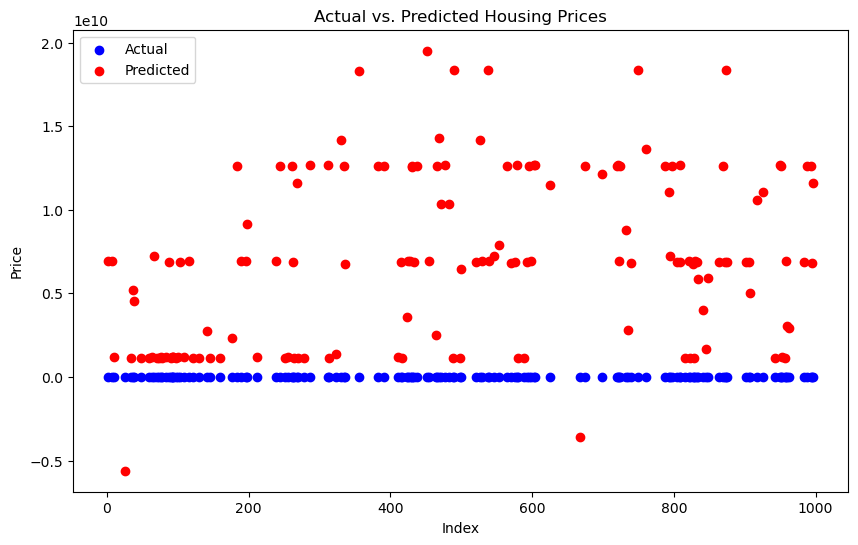

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame with Actual and Predicted Prices
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(predictions.index, predictions['Actual'], color='blue', label='Actual')
plt.scatter(predictions.index, predictions['Predicted'], color='red', label='Predicted')
plt.title('Actual vs. Predicted Housing Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()




The graph displays a scatter plot comparing the #Actual housing prices (in blue) versus the Predicted housing prices (in red).

## Significance
## Visual Representation:

Actual Prices: These blue points represent the true market prices of the houses in our testing set.

Predicted Prices: These red points represent the prices predicted by our linear regression model.

## Comparison:

The closeness of the red points to the blue points shows how accurate our model is. In an ideal model, the red and blue points would overlap, indicating perfect predictions.

In our graph, the large disparity between the actual and predicted prices suggests that our model is not performing well. The predicted prices are significantly higher than the actual prices.

## Model Evaluation:

The graph helps visually diagnose the model's performance.

Significant deviations indicate potential issues in feature selection, data quality, or model complexity.

## Insights:

Outliers and Errors: Identifying where the predictions deviate the most can provide insights into which houses (or types of houses) the model is struggling to predict accurately.

Improvement Areas: The substantial overestimations suggest that we may need to revisit our data preprocessing steps, consider additional features, or perhaps use a more complex model.

## Conclusion:
This graph is crucial in visually assessing the performance of our linear regression model. While the significant errors suggest our current model isn't reliable for predicting housing prices, it also highlights the areas we need to focus on for improvement, such as better data cleaning and feature selection.

The process of continuous refinement is essential in creating a robust predictive model. 